In [2]:
import networkx as nx
import pandas as pd
import numpy as np
from pyvis.network import Network
import os

In [25]:
df = pd.read_csv('/home/nastya/Bacteroides_uniformis_annotations/metatranscriptomics/WGCNA/modules_final/merged/0.10_net_merged_add.txt', sep='\t')
df

,fromNode,toNode,weight,direction,fromAltName,toAltName
0,aat,BACUNI_00070,0.106085,undirected,NaN,NaN
1,aat,BACUNI_00601,0.106567,undirected,NaN,NaN
2,aat,BACUNI_00746,0.111060,undirected,NaN,NaN
3,aat,BACUNI_04303,0.102822,undirected,NaN,NaN
4,aat,BACUNI_04487,0.112958,undirected,NaN,NaN
...,...,...,...,...,...,...
866112,yicJ_1,yidC,-0.136996,undirected,NaN,NaN
866113,yicJ_1,yjmD_2,0.251382,undirected,NaN,NaN
866114,yicJ_1,znuB,-0.167939,undirected,NaN,NaN
866115,yjmD_2,ynfM,-0.119073,undirected,NaN,NaN


In [28]:
df = pd.read_csv('/home/nastya/Bacteroides_uniformis_annotations/metatranscriptomics/WGCNA/prot_modules/0.1_net_prot.txt', sep='\t')
df

,fromNode,toNode,weight,direction,fromAltName,toAltName
0,BACUNI_00026,BACUNI_00039,-0.146889,undirected,NaN,NaN
1,BACUNI_00026,BACUNI_00047,-0.369946,undirected,NaN,NaN
2,BACUNI_00026,BACUNI_00053,-0.362482,undirected,NaN,NaN
3,BACUNI_00026,BACUNI_00054,-0.418143,undirected,NaN,NaN
4,BACUNI_00026,BACUNI_00092,0.451974,undirected,NaN,NaN
...,...,...,...,...,...,...
871058,yfiO,yidC,0.472087,undirected,NaN,NaN
871059,yfiO,yqeV,0.147963,undirected,NaN,NaN
871060,yidC,yqeV,0.248823,undirected,NaN,NaN
871061,yidC,zwf,-0.126781,undirected,NaN,NaN


In [15]:
pd.merge(df, df1, on=['fromNode', 'toNode'])

,fromNode,toNode,weight_x,direction_x,fromAltName_x,toAltName_x,weight_y,direction_y,fromAltName_y,toAltName_y
0,accC,coaD,0.172376,undirected,NaN,NaN,-0.266626,undirected,NaN,NaN
1,accC,cobJ,0.184572,undirected,NaN,NaN,-0.343832,undirected,NaN,NaN
2,accC,cysS,0.167700,undirected,NaN,NaN,0.428407,undirected,NaN,NaN
3,accC,dnaX,0.186783,undirected,NaN,NaN,0.193908,undirected,NaN,NaN
4,accC,ftsZ,0.154042,undirected,NaN,NaN,0.470366,undirected,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
18009,uvrA,valS,0.171677,undirected,NaN,NaN,0.442286,undirected,NaN,NaN
18010,uvrA,yidC,0.152077,undirected,NaN,NaN,0.444427,undirected,NaN,NaN
18011,uxaB,valS,-0.161495,undirected,NaN,NaN,0.210354,undirected,NaN,NaN
18012,valS,waaA,0.206744,undirected,NaN,NaN,0.523869,undirected,NaN,NaN


In [7]:
58531/866117

0.06757862967705287

In [12]:
df[(df['fromNode']== 'BACUNI_00526') ^ (df['toNode']=='BACUNI_00526')].shape

(84, 6)

In [10]:
pd.merge(df[(df['fromNode']== 'BACUNI_00526') ^ (df['toNode']=='BACUNI_00526')], df1[(df1['fromNode']== 'BACUNI_00526') ^ (df1['toNode']=='BACUNI_00526')], on=['fromNode', 'toNode']).shape

(16, 10)

In [13]:
16/84

0.19047619047619047

In [4]:
abs(df.weight).min()

0.1

In [427]:
df[(df.fromNode=='aat')&(df.toNode=='acrF')]

,fromNode,toNode,weight,direction,fromAltName,toAltName
0,aat,acrF,0.118562,undirected,NaN,NaN


In [428]:
df[(df.fromNode=='acrF')&(df.toNode=='aat')]

,fromNode,toNode,weight,direction,fromAltName,toAltName


In [155]:
meta = pd.read_csv('/home/nastya/Bacteroides_uniformis_annotations/metatranscriptomics/WGCNA/modules_final/merged/0.10_nodes_merged_add.txt', sep='\t')
meta

,nodeName,altName,"nodeAttr[nodesPresent, ]"
0,aat,NaN,black
1,accC,NaN,turquoise
2,ackA,NaN,floralwhite
3,adk,NaN,yellow
4,aepX,NaN,steelblue
...,...,...,...
3402,yjmD_2,NaN,yellow
3403,ynfM,NaN,salmon
3404,yqeV,NaN,violet
3405,znuB,NaN,red


In [156]:
meta.groupby('nodeAttr[nodesPresent, ]').count()

,nodeName,altName
"nodeAttr[nodesPresent, ]",,
black,104,0
blue,659,0
cyan,67,0
darkgreen,101,0
darkgrey,32,0
darkmagenta,23,0
darkolivegreen,24,0
darkorange,34,0
darkred,35,0


In [40]:
meta.groupby('nodeAttr[nodesPresent, ]').count().nodeName.sum()

3604

In [76]:
meta[meta['nodeAttr[nodesPresent, ]']=='darkorange']

,nodeName,altName,"nodeAttr[nodesPresent, ]"
276,BACUNI_00726,NaN,darkorange
926,BACUNI_02632,NaN,darkorange
958,BACUNI_02718,NaN,darkorange
1297,BACUNI_03666,NaN,darkorange
1298,BACUNI_03667,NaN,darkorange
1733,bc2018--bc2018___80_01715,NaN,darkorange
2258,thiL,NaN,darkorange


In [266]:
meta_filt = meta[meta['nodeAttr[nodesPresent, ]']=='turquoise'].nodeName
#df_filt = df[(df['fromNode'].isin(meta_filt)) & (df['toNode'].isin(meta_filt))]
df_filt = df[df['fromNode'].isin(meta_filt)]
df_filt = df_filt[df_filt['toNode'].isin(meta_filt)]

In [267]:
a = df_filt.toNode.to_list()
b = df_filt.fromNode.to_list()
red = set(a+b)

In [268]:
len(red)

863

In [269]:
for i in red:
    print(i)

BACUNI_00037
BACUNI_01500
BACUNI_01010
nrfH
BACUNI_02027
BACUNI_00880
BACUNI_04024
BACUNI_03957
BACUNI_04146
BACUNI_00302
BACUNI_01376
BACUNI_02594
BACUNI_00581
BACUNI_04297
BACUNI_02902
bc2018--bc2018___80_01855
BACUNI_03205
BACUNI_01892
BACUNI_00709
BACUNI_00416
BACUNI_01139
BACUNI_00310
BACUNI_01781
BACUNI_03449
BACUNI_01953
BACUNI_03949
rbfA
BACUNI_03179
BACUNI_01118
BACUNI_04124
cysN
BACUNI_04192
BACUNI_04301
BACUNI_03988
BACUNI_04413
BACUNI_04622
cadA
bc2018--bc2018___80_01672
pstC
BACUNI_04637
BACUNI_03177
bc2018--bc2018___80_02702
dinB
argF
BACUNI_01709
BACUNI_00633
bc2018--bc2018___80_00907
BACUNI_01651
BACUNI_04567
BACUNI_03084
bc2018--bc2018___80_03081
radC
BACUNI_00072
BACUNI_02857
BACUNI_04315
BACUNI_01451
BACUNI_03175
BACUNI_03518
contig_4_ncRNA15
BACUNI_04706
wcaJ_2
BACUNI_02680
BACUNI_03356
ettA
BACUNI_02115
rny
BACUNI_00623
bc2018--bc2018___80_02915
BACUNI_00529
BACUNI_02498
BACUNI_00081
BACUNI_03993
BACUNI_02128
BACUNI_04132
BACUNI_03858
bc2018--bc2018___80_00727
nanM

In [65]:
for i in set(meta[meta['nodeAttr[nodesPresent, ]']=='greenyellow'].nodeName.to_list()):
    print(i)

queF
BACUNI_03783
galK
BACUNI_02197
BACUNI_02630
BACUNI_03319
BACUNI_02096
BACUNI_01284
BACUNI_03776
BACUNI_00458
BACUNI_01658
rpmA
BACUNI_04543
BACUNI_01668
BACUNI_04204
BACUNI_00051
BACUNI_02143
BACUNI_01722
dtd
BACUNI_01090
BACUNI_02016
BACUNI_00134
BACUNI_04544
BACUNI_01789
bc2018--bc2018___80_02255
bc2018--bc2018___80_01305
BACUNI_02946
BACUNI_01657
BACUNI_04133
BACUNI_03781
cutC
bc2018--bc2018___80_03096
BACUNI_04151
BACUNI_00817
BACUNI_02629
BACUNI_00526
tag
BACUNI_03778
rpsT
BACUNI_01397
BACUNI_01698
BACUNI_01573
BACUNI_01794
BACUNI_01075
bc2018--bc2018___80_02478
BACUNI_03651
queC
BACUNI_01234
BACUNI_04188
BACUNI_01099
BACUNI_04647
BACUNI_02356
BACUNI_03777
BACUNI_03599
bc2018--bc2018___80_01963
BACUNI_01549
contig_4_ncRNA22
BACUNI_01567
bc2018--bc2018___80_02039
BACUNI_04586
BACUNI_03743
BACUNI_01691
BACUNI_04040
BACUNI_01283
BACUNI_04611
BACUNI_00775
BACUNI_04442
BACUNI_00776
BACUNI_03386
BACUNI_00050
kduI
contig_4_ncRNA21
rpmE2
BACUNI_02013
BACUNI_01079
BACUNI_02012
BACUNI_

In [186]:
df_filt.shape

(1131, 6)

In [116]:
df_filt

,fromNode,toNode,weight,direction,fromAltName,toAltName
6267,ald,argB,-0.237793,undirected,NaN,NaN
6270,ald,aroK,-0.143422,undirected,NaN,NaN
6290,ald,BACUNI_00102,0.221501,undirected,NaN,NaN
6333,ald,BACUNI_00275,-0.107084,undirected,NaN,NaN
6356,ald,BACUNI_00348,-0.140106,undirected,NaN,NaN
...,...,...,...,...,...,...
1281422,trmD,znuB,0.121668,undirected,NaN,NaN
1281452,truA,yidD,0.108819,undirected,NaN,NaN
1281454,truA,znuB,0.128910,undirected,NaN,NaN
1281648,waaA,ynfM,0.101037,undirected,NaN,NaN


In [252]:
df_filt = df[(df['fromNode']== 'BACUNI_00526') ^ (df['toNode']=='BACUNI_00526')]

In [184]:
df_filt[df_filt.weight > 0]

,fromNode,toNode,weight,direction,fromAltName,toAltName
10859,aroQ,BACUNI_00526,0.109827,undirected,NaN,NaN
166204,BACUNI_00526,BACUNI_00662,0.139925,undirected,NaN,NaN
166210,BACUNI_00526,BACUNI_01075,0.109713,undirected,NaN,NaN
166212,BACUNI_00526,BACUNI_01099,0.132244,undirected,NaN,NaN
166214,BACUNI_00526,BACUNI_01273,0.112532,undirected,NaN,NaN
166217,BACUNI_00526,BACUNI_01473,0.105394,undirected,NaN,NaN
166219,BACUNI_00526,BACUNI_01639,0.121695,undirected,NaN,NaN
166221,BACUNI_00526,BACUNI_01695,0.117779,undirected,NaN,NaN
166222,BACUNI_00526,BACUNI_01722,0.102820,undirected,NaN,NaN
166223,BACUNI_00526,BACUNI_01817,0.125409,undirected,NaN,NaN


In [32]:
df_filt = df[(df['fromNode']== 'recA') ^ (df['toNode']=='recA')]

In [191]:
df_filt = df[(df['fromNode']== 'bc2018--bc2018___80_03723')]

In [34]:
my_list = ['BACUNI_00526', 'recA', 'dinB', 'recN', 'nusA', 'dnaK', 'ruvA', 'uvrB', 'uvrA', 'polA']
#my_list = ['dnaK', 'nusA', 'recN', 'uvrA']
df_filt = df[(df['fromNode'].isin(my_list)) & (df['toNode'].isin(my_list))]
#df_filt = df[df['fromNode'].isin(my_list)]
#df_filt = df_filt[df_filt['toNode'].isin(my_list)]

In [175]:
df_filt = df_filt[df_filt.weight > 0]

In [35]:
df_filt

,fromNode,toNode,weight,direction,fromAltName,toAltName
142173,BACUNI_00526,dinB,-0.382546,undirected,NaN,NaN
142253,BACUNI_00526,polA,-0.148076,undirected,NaN,NaN
142267,BACUNI_00526,recA,-0.466828,undirected,NaN,NaN
142270,BACUNI_00526,recN,-0.181241,undirected,NaN,NaN
142285,BACUNI_00526,ruvA,0.210267,undirected,NaN,NaN
142312,BACUNI_00526,uvrA,-0.176314,undirected,NaN,NaN
142313,BACUNI_00526,uvrB,-0.321089,undirected,NaN,NaN
827243,dinB,polA,0.428654,undirected,NaN,NaN
827270,dinB,recA,0.560829,undirected,NaN,NaN
827273,dinB,recN,0.410782,undirected,NaN,NaN


In [249]:
a = df_filt.toNode.to_list()
b = df_filt.fromNode.to_list()
tr = set(a+b)

In [254]:
a = df_filt.toNode.to_list()
b = df_filt.fromNode.to_list()
pr = set(a+b)

In [256]:
for i in tr & pr:
    print(i)

BACUNI_01639
queC
BACUNI_04367
BACUNI_02311
panC
BACUNI_01817
BACUNI_01938
tilS
BACUNI_03674
BACUNI_01283
BACUNI_00526
BACUNI_02197
BACUNI_01099
BACUNI_00662
BACUNI_01075
BACUNI_01273
BACUNI_04458


In [130]:
df_filt.to_csv('blue_net.tsv', index=False,sep='\t')

In [389]:
my_list = ['recA', 'dinB', 'recN', 'nusA', 'dnaK', 'ruvA', 'uvrB', 'uvrA', 'polA']
df_filt = df[df['fromNode'].isin(my_list)]
#df_filt = df[(df['fromNode'].isin(my_list)) ^ (df['toNode'].isin(meta_filt))]

In [187]:
df_filt = df_filt[abs(df_filt.weight) > 0.13]

In [241]:
my_list = ['raiA',
 'rplA',
 'rplB',
 'rplC',
 'rplD',
 'rplE',
 'rplF',
 'rplI',
 'rplJ',
 'rplK',
 'rplL',
 'rplM',
 'rplN',
 'rplO',
 'rplQ',
 'rplR',
 'rplS',
 'rplT',
 'rplU',
 'rplW',
 'rplX',
 'rplY',
 'rpmA',
 'rpmB',
 'rpmC',
 'rpmD',
 'rpmH',
 'rpmI',
 'rpsB',
 'rpsC',
 'rpsD',
 'rpsE',
 'rpsF',
 'rpsG',
 'rpsI',
 'rpsJ',
 'rpsK',
 'rpsL',
 'rpsM',
 'rpsN',
 'rpsO',
 'rpsP',
 'rpsQ',
 'rpsT',
 'rpsU']
#df_filt = df[(df['fromNode'].isin(my_list)) ^ (df['toNode'].isin(my_list))]
df_filt = df[df['fromNode'].isin(my_list)]
df_filt = df_filt[df_filt['toNode'].isin(my_list)]

In [271]:
my_list = ['BACUNI_00526', 
          'murE','ykfB','bioA','hddC','mtnN','mraY','murE','eglS','bioA','kdsD','nadA','spoU','cca','pgk','murE',
'ftsI','ykfB',
'mtgA',
'cydB',
'infB',
'nusA',
'rimP',
'ftsW',
'murD',
'pgl',
'cbiA',
'acsA',
'pgl',
'xylA',
'queH',
'murD',
'mraY',
'ppk',
'pdxK'
]
#df_filt = df[(df['fromNode'].isin(my_list)) ^ (df['toNode'].isin(my_list))]
df_filt = df[df['fromNode'].isin(my_list)]
df_filt = df_filt[df_filt['toNode'].isin(my_list)]

In [30]:
df_minus = df_filt[df_filt.weight < 0]
df_minus.shape

(12, 6)

In [31]:
G = nx.from_pandas_edgelist(df_filt, source='fromNode', target='toNode', edge_attr="weight")

In [32]:
G.add_node('dinB', color='violet')
G.add_node('recA', color='violet')
G.add_node('recN', color='violet')
G.add_node('nusA', color='violet')
G.add_node('dnaK', color='violet')
G.add_node('ruvA', color='violet')
G.add_node('uvrA', color='violet')
G.add_node('uvrB', color='violet')
G.add_node('polA', color='violet')
G.add_node('BACUNI_00526', color='violet', label='lexA')

for _,row in df_filt.iterrows():
    G.add_edge(row['fromNode'], row['toNode'], weight=row['weight'], color='#97c2fc')

for _,row in df_minus.iterrows():
    G.add_edge(row['fromNode'], row['toNode'], weight=row['weight'], color='red')

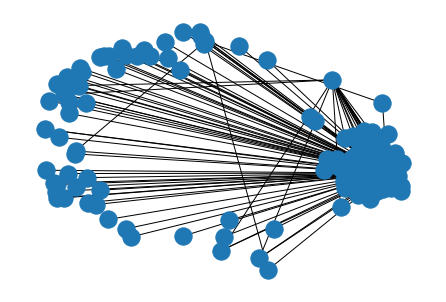

In [262]:
nx.draw(G)

In [33]:
net = Network(notebook=True)
net.from_nx(G)
#net.toggle_physics(False)
net.show('example_uuu.html')

example_uuu.html


In [279]:
net.nodes

[{'color': '#97c2fc',
  'size': 10,
  'id': 'dinB',
  'label': 'dinB',
  'shape': 'dot'},
 {'color': '#97c2fc',
  'size': 10,
  'id': 'dnaJ_1',
  'label': 'dnaJ_1',
  'shape': 'dot'},
 {'color': '#97c2fc',
  'size': 10,
  'id': 'dnaJ_2',
  'label': 'dnaJ_2',
  'shape': 'dot'},
 {'color': '#97c2fc',
  'size': 10,
  'id': 'fbaB',
  'label': 'fbaB',
  'shape': 'dot'},
 {'color': '#97c2fc',
  'size': 10,
  'id': 'fieF',
  'label': 'fieF',
  'shape': 'dot'},
 {'color': '#97c2fc',
  'size': 10,
  'id': 'fim1C_4',
  'label': 'fim1C_4',
  'shape': 'dot'},
 {'color': '#97c2fc',
  'size': 10,
  'id': 'fim1C_5',
  'label': 'fim1C_5',
  'shape': 'dot'},
 {'color': '#97c2fc',
  'size': 10,
  'id': 'ftnA_3',
  'label': 'ftnA_3',
  'shape': 'dot'},
 {'color': '#97c2fc',
  'size': 10,
  'id': 'gpmA_2',
  'label': 'gpmA_2',
  'shape': 'dot'},
 {'color': '#97c2fc',
  'size': 10,
  'id': 'groL',
  'label': 'groL',
  'shape': 'dot'},
 {'color': '#97c2fc',
  'size': 10,
  'id': 'groS',
  'label': 'groS',
 

In [156]:
#In which color is lexA

files = os.listdir('metatranscriptomics/WGCNA/prot_modules/colors')
for file in files:
    a = pd.read_csv(f'metatranscriptomics/WGCNA/prot_modules/colors/{file}', sep='\t', names=['genes']).genes.to_list()
    for i in a:
        if 'BACUNI_00526' in i:
            print(file)

module_prot_blue.txt


In [157]:
my_list = ['BACUNI_00526', 'recA', 'dinB', 'recN', 'nusA', 'dnaK', 'ruvA', 'uvrB', 'uvrA', 'polA']
files = os.listdir('metatranscriptomics/WGCNA/modules_final/merged/colors')
for gene in my_list:
    for file in files:
        a = pd.read_csv(f'metatranscriptomics/WGCNA/modules_final/merged/colors/{file}', sep='\t', names=['genes']).genes.to_list()
        for i in a:
            if gene in i:
                print(gene, file)

BACUNI_00526 module_merged_red.txt
recA module_merged_turquoise.txt
dinB module_merged_turquoise.txt
recN module_merged_blue.txt
nusA module_merged_black.txt
dnaK module_merged_darkolivegreen.txt
ruvA module_merged_turquoise.txt
uvrB module_merged_lightcyan.txt
uvrA module_merged_blue.txt
polA module_merged_grey60.txt


In [242]:
files = os.listdir('metatranscriptomics/WGCNA/modules_final/merged/colors')
for gene in my_list:
    for file in files:
        a = pd.read_csv(f'metatranscriptomics/WGCNA/modules_final/merged/colors/{file}', sep='\t', names=['genes']).genes.to_list()
        for i in a:
            if gene in i:
                print(gene, file)

raiA module_merged_black.txt
rplA module_merged_darkorange.txt
rplB module_merged_lightyellow.txt
rplC module_merged_pink.txt
rplD module_merged_darkorange.txt
rplE module_merged_darkorange.txt
rplF module_merged_darkorange.txt
rplI module_merged_lightyellow.txt
rplJ module_merged_darkmagenta.txt
rplK module_merged_pink.txt
rplL module_merged_lightyellow.txt
rplM module_merged_pink.txt
rplN module_merged_lightyellow.txt
rplO module_merged_darkorange.txt
rplQ module_merged_darkorange.txt
rplR module_merged_darkorange.txt
rplS module_merged_lightyellow.txt
rplT module_merged_lightyellow.txt
rplU module_merged_pink.txt
rplW module_merged_lightyellow.txt
rplX module_merged_lightyellow.txt
rplY module_merged_pink.txt
rpmA module_merged_darkturquoise.txt
rpmB module_merged_darkturquoise.txt
rpmC module_merged_grey60.txt
rpmD module_merged_salmon.txt
rpmH module_merged_darkturquoise.txt
rpmI module_merged_darkturquoise.txt
rpsB module_merged_pink.txt
rpsC module_merged_yellow.txt
rpsD module_

In [196]:
my_list = ['cysD', 'cysK', 'cysQ', 'moeZ', 'sufS', 'thrC']
files = os.listdir('metatranscriptomics/WGCNA/modules_final/merged/colors')
for gene in my_list:
    for file in files:
        a = pd.read_csv(f'metatranscriptomics/WGCNA/modules_final/merged/colors/{file}', sep='\t', names=['genes']).genes.to_list()
        for i in a:
            if gene in i:
                print(gene, file)

cysD module_merged_turquoise.txt
cysK module_merged_tan.txt
cysQ module_merged_darkgreen.txt
moeZ module_merged_darkturquoise.txt
sufS module_merged_blue.txt
thrC module_merged_lightsteelblue1.txt


In [117]:
my_list = ['BACUNI_00526', 'recA', 'dinB', 'recN', 'nusA', 'dnaK', 'ruvA', 'uvrB', 'uvrA', 'polA']
files = os.listdir('metatranscriptomics/WGCNA/modules_final/colors')
for gene in my_list:
    for file in files:
        a = pd.read_csv(f'metatranscriptomics/WGCNA/modules_final/colors/{file}', sep='\t', names=['genes']).genes.to_list()
        for i in a:
            if gene in i:
                print(gene, file)

BACUNI_00526 module_green.txt
recA module_turquoise.txt
dinB module_turquoise.txt
recN module_yellow.txt
nusA module_red.txt
dnaK module_red.txt
ruvA module_turquoise.txt
uvrB module_royalblue.txt
uvrA module_red.txt
polA module_lightgreen.txt


In [243]:
my_list = ['BACUNI_00526', 'recA', 'dinB', 'recN', 'nusA', 'dnaK', 'ruvA', 'uvrB', 'uvrA', 'polA']
files = os.listdir('metatranscriptomics/WGCNA/prot_modules/colors')
for gene in my_list:
    for file in files:
        a = pd.read_csv(f'metatranscriptomics/WGCNA/prot_modules/colors/{file}', sep='\t', names=['genes']).genes.to_list()
        for i in a:
            if gene in i:
                print(gene, file)

BACUNI_00526 module_prot_blue.txt
recA module_prot_darkgreen.txt
dinB module_prot_blue.txt
recN module_prot_blue.txt
nusA module_prot_midnightblue.txt
dnaK module_prot_lightyellow.txt
ruvA module_prot_turquoise.txt
uvrB module_prot_tan.txt
uvrA module_prot_turquoise.txt
polA module_prot_yellow.txt


In [245]:
a = pd.read_csv(f'metatranscriptomics/WGCNA/prot_modules/colors/module_prot_blue.txt', sep='\t', names=['genes']).genes.to_list()
b = pd.read_csv(f'metatranscriptomics/WGCNA/modules_final/merged/colors/module_merged_red.txt', sep='\t', names=['genes']).genes.to_list()
set(a)&set(b)

{'BACUNI_00454',
 'BACUNI_00526',
 'BACUNI_01075',
 'BACUNI_02028',
 'BACUNI_03743',
 'BACUNI_03991',
 'tag',
 'tdk'}

In [115]:
my_list = ['ahpF',
 'BACUNI_03743',
 'BACUNI_03652',
 'BACUNI_03643',
 'BACUNI_03512',
 'BACUNI_03481',
 'BACUNI_03391',
 'BACUNI_03387',
 'BACUNI_03182',
 'BACUNI_03757',
 'BACUNI_03083',
 'BACUNI_02788',
 'BACUNI_02748',
 'BACUNI_02713',
 'BACUNI_02648',
 'BACUNI_02645',
 'BACUNI_02644',
 'BACUNI_02643',
 'BACUNI_02460',
 'BACUNI_02789',
 'BACUNI_03818',
 'BACUNI_03819',
 'BACUNI_03859',
 'otsB',
 'mraZ',
 'grpE',
 'groS',
 'groL',
 'dnaK',
 'clpB',
 'bc2018--bc2018___80_02675',
 'bc2018--bc2018___80_02478',
 'bc2018--bc2018___80_01083',
 'bc2018--bc2018___80_00697',
 'BACUNI_04692',
 'BACUNI_04593',
 'BACUNI_04543',
 'BACUNI_04535',
 'BACUNI_04263',
 'BACUNI_04043',
 'BACUNI_04040',
 'BACUNI_03980',
 'BACUNI_02455',
 'BACUNI_02454',
 'BACUNI_03319',
 'BACUNI_02222',
 'BACUNI_00850',
 'BACUNI_00770',
 'BACUNI_00769',
 'BACUNI_00754']

In [116]:
files = os.listdir('metatranscriptomics/WGCNA/prot_modules/colors')
for gene in my_list:
    for file in files:
        a = pd.read_csv(f'metatranscriptomics/WGCNA/prot_modules/colors/{file}', sep='\t', names=['genes']).genes.to_list()
        for i in a:
            if gene in i:
                print(gene, file)

ahpF module_prot_blue.txt
BACUNI_03743 module_prot_blue.txt
BACUNI_03652 module_prot_blue.txt
BACUNI_03643 module_prot_green.txt
BACUNI_03391 module_prot_red.txt
BACUNI_03182 module_prot_brown.txt
BACUNI_03757 module_prot_turquoise.txt
BACUNI_02713 module_prot_greenyellow.txt
BACUNI_02648 module_prot_brown.txt
BACUNI_02645 module_prot_darkorange.txt
BACUNI_02644 module_prot_darkorange.txt
BACUNI_02643 module_prot_darkorange.txt
BACUNI_02460 module_prot_lightcyan.txt
BACUNI_03818 module_prot_cyan.txt
BACUNI_03859 module_prot_skyblue.txt
mraZ module_prot_tan.txt
grpE module_prot_brown.txt
groS module_prot_darkgreen.txt
groL module_prot_darkgreen.txt
dnaK module_prot_lightyellow.txt
clpB module_prot_midnightblue.txt
BACUNI_04692 module_prot_blue.txt
BACUNI_04593 module_prot_yellow.txt
BACUNI_04543 module_prot_blue.txt
BACUNI_04040 module_prot_greenyellow.txt
BACUNI_03980 module_prot_turquoise.txt
BACUNI_02454 module_prot_brown.txt
BACUNI_03319 module_prot_turquoise.txt
BACUNI_02222 module

In [49]:
# comparison of prot and transc

In [108]:
pr = pd.read_csv('/home/nastya/Bacteroides_uniformis_annotations/metatranscriptomics/WGCNA/prot_modules/0.1_net_prot.txt', sep='\t')
pr

,fromNode,toNode,weight,direction,fromAltName,toAltName
0,BACUNI_00026,BACUNI_00039,-0.146889,undirected,NaN,NaN
1,BACUNI_00026,BACUNI_00047,-0.369946,undirected,NaN,NaN
2,BACUNI_00026,BACUNI_00053,-0.362482,undirected,NaN,NaN
3,BACUNI_00026,BACUNI_00054,-0.418143,undirected,NaN,NaN
4,BACUNI_00026,BACUNI_00092,0.451974,undirected,NaN,NaN
...,...,...,...,...,...,...
871058,yfiO,yidC,0.472087,undirected,NaN,NaN
871059,yfiO,yqeV,0.147963,undirected,NaN,NaN
871060,yidC,yqeV,0.248823,undirected,NaN,NaN
871061,yidC,zwf,-0.126781,undirected,NaN,NaN


In [101]:
tr = pd.read_csv('/home/nastya/Bacteroides_uniformis_annotations/metatranscriptomics/WGCNA/modules/0.1_net_egg.txt', sep='\t')
tr

,fromNode,toNode,weight,direction,fromAltName,toAltName
0,aat,argF,0.149288,undirected,NaN,NaN
1,aat,BACUNI_00037,-0.152210,undirected,NaN,NaN
2,aat,BACUNI_00085,-0.121280,undirected,NaN,NaN
3,aat,BACUNI_00133,-0.106825,undirected,NaN,NaN
4,aat,BACUNI_00171,-0.152288,undirected,NaN,NaN
...,...,...,...,...,...,...
1431542,yidD,znuB,0.246192,undirected,NaN,NaN
1431543,yidD,zwf,-0.140652,undirected,NaN,NaN
1431544,yjmD_2,ynfM,-0.385183,undirected,NaN,NaN
1431545,yjmD_2,znuB,-0.369875,undirected,NaN,NaN


In [58]:
pr_l = pr[(pr['fromNode']== 'BACUNI_00526') ^ (pr['toNode']=='BACUNI_00526')]
pr_l = pr_l.reset_index().drop('index', axis=1)
pr_l

,fromNode,toNode,weight,direction,fromAltName,toAltName
0,BACUNI_00026,BACUNI_00526,-0.190495,undirected,NaN,NaN
1,BACUNI_00039,BACUNI_00526,0.128537,undirected,NaN,NaN
2,BACUNI_00047,BACUNI_00526,0.254763,undirected,NaN,NaN
3,BACUNI_00054,BACUNI_00526,0.285872,undirected,NaN,NaN
4,BACUNI_00092,BACUNI_00526,-0.413968,undirected,NaN,NaN
...,...,...,...,...,...,...
844,BACUNI_00526,xerC,-0.432108,undirected,NaN,NaN
845,BACUNI_00526,xseA,-0.305428,undirected,NaN,NaN
846,BACUNI_00526,yaeT,-0.109159,undirected,NaN,NaN
847,BACUNI_00526,yajC,-0.212749,undirected,NaN,NaN


In [59]:
tr_l = tr[(tr['fromNode']== 'BACUNI_00526') ^ (tr['toNode']=='BACUNI_00526')]
tr_l = tr_l.reset_index().drop('index', axis=1)
tr_l

,fromNode,toNode,weight,direction,fromAltName,toAltName
0,accC,BACUNI_00526,0.178323,undirected,NaN,NaN
1,ackA,BACUNI_00526,0.128358,undirected,NaN,NaN
2,adk,BACUNI_00526,0.308613,undirected,NaN,NaN
3,agcS,BACUNI_00526,0.265910,undirected,NaN,NaN
4,alaS,BACUNI_00526,0.220284,undirected,NaN,NaN
...,...,...,...,...,...,...
1787,BACUNI_00526,yidC,0.227235,undirected,NaN,NaN
1788,BACUNI_00526,yidD,0.165853,undirected,NaN,NaN
1789,BACUNI_00526,yjmD_2,-0.273136,undirected,NaN,NaN
1790,BACUNI_00526,ynfM,0.187313,undirected,NaN,NaN


In [65]:
summary = pd.merge(tr, pr, how='inner', on=['fromNode', 'toNode'])
summary.shape

(192904, 10)

In [75]:
my_list = ['BACUNI_00526', 'recA', 'dinB', 'recN', 'nusA', 'dnaK', 'ruvA', 'uvrB', 'uvrA', 'polA']
df_filt = summary[(summary['fromNode'].isin(my_list)) & (summary['toNode'].isin(my_list))]
df_filt.shape

(3, 10)

In [76]:
df_filt

,fromNode,toNode,weight_x,direction_x,fromAltName_x,toAltName_x,weight_y,direction_y,fromAltName_y,toAltName_y
32630,BACUNI_00526,recN,0.130316,undirected,NaN,NaN,-0.181241,undirected,NaN,NaN
32657,BACUNI_00526,uvrA,0.181542,undirected,NaN,NaN,-0.176314,undirected,NaN,NaN
190081,recN,uvrA,0.197756,undirected,NaN,NaN,0.183960,undirected,NaN,NaN


In [77]:
df_minus = df_filt[df_filt.weight_y < 0]
df_minus.shape

(2, 10)

In [78]:
G = nx.from_pandas_edgelist(df_filt, source='fromNode', target='toNode', edge_attr="weight_y")

In [79]:
G.add_node('dinB', color='violet')
G.add_node('recA', color='violet')
G.add_node('recN', color='violet')
G.add_node('nusA', color='violet')
G.add_node('dnaK', color='violet')
G.add_node('ruvA', color='violet')
G.add_node('uvrA', color='violet')
G.add_node('uvrB', color='violet')
G.add_node('polA', color='violet')
G.add_node('BACUNI_00526', color='violet', label='lexA')

for _,row in df_filt.iterrows():
    G.add_edge(row['fromNode'], row['toNode'], weight=row['weight_y'], color='#97c2fc')

for _,row in df_minus.iterrows():
    G.add_edge(row['fromNode'], row['toNode'], weight=row['weight_y'], color='red')

In [80]:
net = Network(notebook=True)
net.from_nx(G)
#net.toggle_physics(False)
net.show('example_1.html')

example_1.html


In [81]:
sp = pd.read_csv('/home/nastya/Bacteroides_uniformis_annotations/metatranscriptomics/WGCNA/spearman/0.1_net_spear.txt', sep='\t')
sp

,fromNode,toNode,weight,direction,fromAltName,toAltName
0,aat,BACUNI_04168,0.109115,undirected,NaN,NaN
1,accC,BACUNI_00282,-0.100680,undirected,NaN,NaN
2,accC,BACUNI_00373,-0.104956,undirected,NaN,NaN
3,accC,BACUNI_00374,-0.102348,undirected,NaN,NaN
4,accC,BACUNI_00382,-0.119894,undirected,NaN,NaN
...,...,...,...,...,...,...
84605,valS,yjmD_2,-0.133531,undirected,NaN,NaN
84606,valS,ynfM,0.101103,undirected,NaN,NaN
84607,wcaJ_2,xylA,-0.105133,undirected,NaN,NaN
84608,ydcV,yjmD_2,-0.137247,undirected,NaN,NaN


In [82]:
df_filt = sp[(sp['fromNode']== 'BACUNI_00526') ^ (sp['toNode']=='BACUNI_00526')]
df_filt

,fromNode,toNode,weight,direction,fromAltName,toAltName
9489,BACUNI_00318,BACUNI_00526,-0.110872,undirected,NaN,NaN
13624,BACUNI_00361,BACUNI_00526,-0.116536,undirected,NaN,NaN
14881,BACUNI_00370,BACUNI_00526,-0.103173,undirected,NaN,NaN
15665,BACUNI_00373,BACUNI_00526,-0.105277,undirected,NaN,NaN
16113,BACUNI_00374,BACUNI_00526,-0.105765,undirected,NaN,NaN
16949,BACUNI_00376,BACUNI_00526,-0.111856,undirected,NaN,NaN
18108,BACUNI_00382,BACUNI_00526,-0.135275,undirected,NaN,NaN
18645,BACUNI_00383,BACUNI_00526,-0.118908,undirected,NaN,NaN
20913,BACUNI_00526,BACUNI_00950,-0.106563,undirected,NaN,NaN
20914,BACUNI_00526,BACUNI_01089,-0.125257,undirected,NaN,NaN


In [131]:
df_filt = sp[(sp['fromNode']== 'SusR') ^ (sp['toNode']=='susR')]
df_filt

,fromNode,toNode,weight,direction,fromAltName,toAltName


In [90]:
my_list = ['ahpF', 'otsB', 'mraZ', 'grpE', 'groS', 'groL', 'dnaK', 'clpB']
#df_filt = df[(df['fromNode'].isin(my_list)) ^ (df['toNode'].isin(my_list))]
df_filt = df[df['fromNode'].isin(my_list)]
df_filt = df_filt[df_filt['toNode'].isin(my_list)]

In [91]:
df_minus = df_filt[df_filt.weight < 0]
df_minus.shape

(1, 6)

In [92]:
G = nx.from_pandas_edgelist(df_filt, source='fromNode', target='toNode', edge_attr="weight")

In [93]:
net = Network(notebook=True)
net.from_nx(G)
#net.toggle_physics(False)
net.show('example_1.html')

example_1.html


In [133]:
my_list=['ahpF', 'BACUNI_00526','otsB', 'mraZ', 'grpE', 'groS', 'groL', 'dnaK', 'clpB']
files = os.listdir('metatranscriptomics/WGCNA/prot_spear/colors')
for gene in my_list:
    for file in files:
        a = pd.read_csv(f'metatranscriptomics/WGCNA/prot_spear/colors/{file}', sep='\t', names=['genes']).genes.to_list()
        for i in a:
            if gene in i:
                print(gene, file)

ahpF module_prot_salmon.txt
BACUNI_00526 module_prot_black.txt
mraZ module_prot_black.txt
grpE module_prot_green.txt
groS module_prot_yellow.txt
groL module_prot_yellow.txt
dnaK module_prot_pink.txt
clpB module_prot_lightgreen.txt


In [134]:
a=pd.read_csv(f'metatranscriptomics/WGCNA/prot_spear/colors/module_prot_salmon.txt', sep='\t', names=['genes']).genes.to_list()
b=pd.read_csv(f'metatranscriptomics/WGCNA/prot_modules/colors/module_prot_blue.txt', sep='\t', names=['genes']).genes.to_list()
set(a)&set(b)

{'BACUNI_01219',
 'BACUNI_01418',
 'BACUNI_01873',
 'BACUNI_03223',
 'BACUNI_03365',
 'BACUNI_03743',
 'ahpF',
 'cutC',
 'lpxB'}

In [136]:
pd.read_csv('/home/nastya/Bacteroides_uniformis_annotations/metatranscriptomics/WGCNA/prot_spear/0.1_net_prot_spear.txt', sep='\t')

,fromNode,toNode,weight,direction,fromAltName,toAltName
0,BACUNI_00026,BACUNI_00053,-0.102672,undirected,NaN,NaN
1,BACUNI_00026,BACUNI_00094,0.125114,undirected,NaN,NaN
2,BACUNI_00026,BACUNI_00153,0.229733,undirected,NaN,NaN
3,BACUNI_00026,BACUNI_00178,-0.147633,undirected,NaN,NaN
4,BACUNI_00026,BACUNI_00189,0.226905,undirected,NaN,NaN
...,...,...,...,...,...,...
293171,yeaZ,yidC,0.118574,undirected,NaN,NaN
293172,yfiO,yidC,0.106890,undirected,NaN,NaN
293173,yfiO,yqeV,0.108210,undirected,NaN,NaN
293174,yidC,yqeV,0.195861,undirected,NaN,NaN


In [222]:
df_filt

,fromNode,toNode,weight,direction,fromAltName,toAltName
864060,rplA,rplB,0.175400,undirected,NaN,NaN
864061,rplA,rplC,0.144953,undirected,NaN,NaN
864062,rplA,rplD,0.162808,undirected,NaN,NaN
864063,rplA,rplE,0.134318,undirected,NaN,NaN
864064,rplA,rplF,0.148076,undirected,NaN,NaN
...,...,...,...,...,...,...
865128,rpsL,rpsP,0.176045,undirected,NaN,NaN
865129,rpsL,rpsT,0.142171,undirected,NaN,NaN
865168,rpsO,rpsP,0.146175,undirected,NaN,NaN
865169,rpsO,rpsT,0.108695,undirected,NaN,NaN


In [223]:
set(df_filt.fromNode.to_list()) ^ set(df_filt.toNode.to_list())

{'rplA', 'rpmD', 'rpsM', 'rpsN', 'rpsQ', 'rpsT', 'rpsU'}

In [234]:
a = df_filt.toNode.to_list().extend()
a

In [238]:
a = df_filt.toNode.to_list()
b = df_filt.fromNode.to_list()

In [240]:
len(set(a+b))

42